In [ ]:
"""
스튜던트 t 분포

Fat tail 현상
데이터 분석 실무에서는 자연에서 발생하는 현상 중 많은 것들을 
정규 분포를 따르는 확률 변수로 모형화하여 사용하고 있다. 
그러나 이러한 데이터들을 자세히 살펴보면 실제로는 
정규분포보다 양 끝단의 비중이 더 큰것을 알 수 있다. 
이를 fat tail 현상이라고 한다.


"""

In [6]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import pandas_datareader.data as web

In [12]:
"""
스튜던트 t 분포
스튜던트 t 분포의 확률 밀도 함수는 다음 수식에 의해 정의된다. 

가우시안 정규 분포와 달리 
정수값을 가지는 자유도(degree of freedom)라는 모수(parameter) ν를 
추가적으로 가진다.


t 분포의 확률 밀도 함수를 그리려면 scipy 패키지의 t 명령을 사용한다. 
이 때 인수 df는 자유도, loc는 기댓값, scale은 표준 편차를 설정한다.
그림에서 자유도  ν가 작으면 가우시안 정규 분포보다 분산이 크고 
fat tail을 보이지만 자유도가 증가할수록 가우시안 정규 분포로 
수렴하는 것을 볼 수 있다.
"""


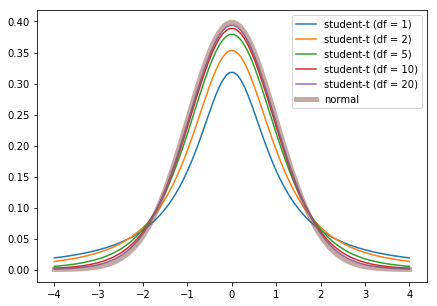

In [21]:
xx = np.linspace(-4, 4, 100)
plt.figure(figsize=(7, 5))
for df in [1, 2, 5, 10, 20]:
    rv = stats.t(df=df)
    plt.plot(xx, rv.pdf(xx), label=("student-t (df = %d)" % df))

plt.plot(xx, stats.norm().pdf(xx), label="normal", lw=5, alpha=0.5)
plt.legend()
plt.show()

In [ ]:
"""
t분포 
기댓값 : E(X) = 0
분산(df >2 일 경우만 적용. df = 1, 2일 경우 분산이 무한대)
Var(X) = df * var / (df - 2)
"""

In [ ]:
"""
정규 분포의 샘플 평균이 이루는 분포

중심 극한 정리(Central Limit Theorem)에 따르면 
모든 확률 변수의 합(또는 평균)은 샘플의 갯수가 증가할수록 
가우시안 정규 분포에 가까워진다. 
그러면 샘플의 수가 무한대가 아닌 유한한 경우는 어떨까?

가우시안 정규 분포로부터 얻은 n개의 샘플 x1,⋯,xn로부터 
얻은 샘플 평균을 샘플 표준편차로 나눈 값은 
자유도가  n−1인 스튜던트 t 분포를 이룬다.

여기에서 중요한 포인트는 샘플 표준편차로 나누었다는 사실이다. 
정규 분포로 부터 얻은 샘플 데이터의 샘플 평균은 
그 자체로는 항상 정규 분포를 따른다. 
샘플 표준편차라고 하는 다른 확률 변수로 나누는 과정에서 
정규 분포가 아닌 스튜던트 t분포를 따르게 된다.
"""

In [27]:
mu = 1
sigma = 2
rv_n = stats.norm(loc=mu, scale=sigma)
N1 = 100
N2 = 2000
X = rv_n.rvs(size=(N1, N2))
x_bar = X.sum(axis=0) / N1
s = np.sqrt(((X - x_bar) ** 2).sum(axis=0) / (N1 - 1))
t = (x_bar - mu) / (s / np.sqrt(N1))


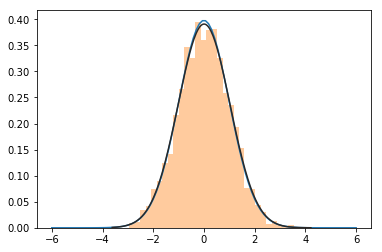

In [28]:
rv_t = stats.t(df=N1-1)
xx = np.linspace(-6, 6, 100)
plt.plot(xx, rv_t.pdf(xx))
sns.distplot(t, kde=False, fit=stats.t)
plt.show()